# Consumo de gasolina en Estados Unidos


## 1. Importar librerías

In [17]:
import pandas as pd
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 2. Cargar dataset

In [18]:
df_gasoline = pd.read_csv(
    "https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/petrol_consumption"
    ".csv")

## 3. Conociendo los datos del dataset

In [19]:
df_gasoline.head()
df_gasoline.describe()

print("\nValores nulos totales: \n", df_gasoline.isnull().sum())


Valores nulos totales: 
 gasolina_impuesto                       0
ingreso_promedio                        0
carreteras_pavimentadas                 0
porcen_licencias_conducion_poblacion    0
gasolina_Consumo                        0
dtype: int64


## 4. Gráficas de las variables del dataset

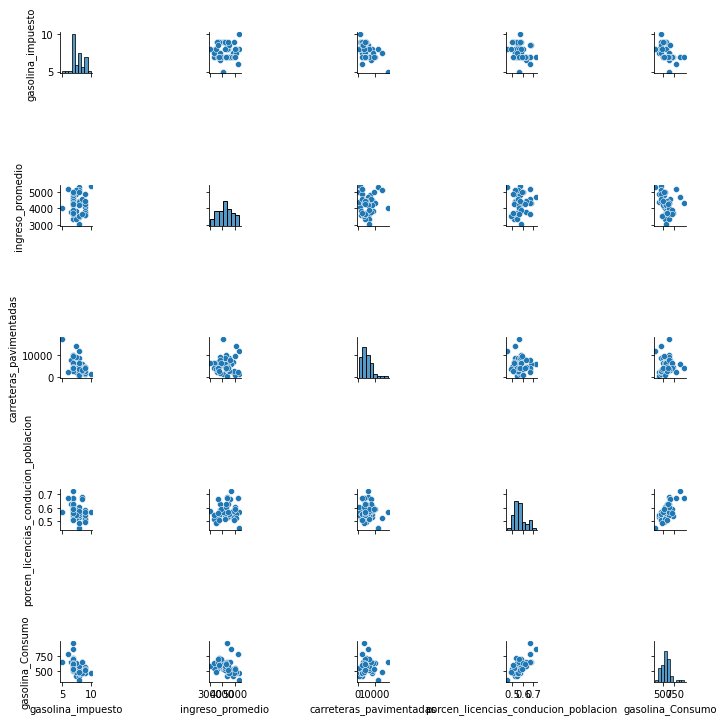

In [20]:
plot_data = df_gasoline.columns
sb.pairplot(df_gasoline[plot_data], height=2)
plt.tight_layout()
plt.show()

## 5. Matriz de correlaciones

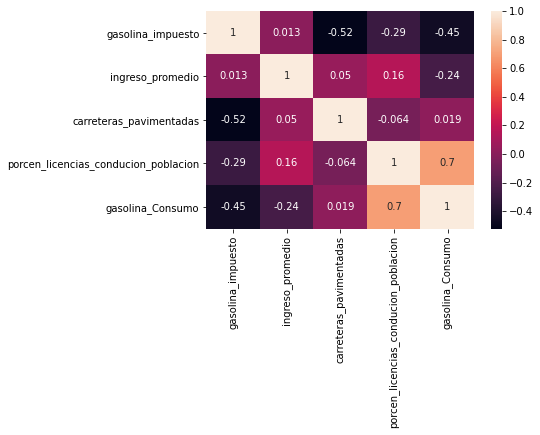

In [21]:
correlation_mat = df_gasoline.corr()
sb.heatmap(correlation_mat, annot=True)
plt.show()

## 6. Eliminar columnas innecesarias

In [22]:
df_gasoline.drop(['carreteras_pavimentadas', 'ingreso_promedio'], axis=1, inplace=True)
df_gasoline.dropna(inplace=True)
print("\nColumnas del modelo: \n", df_gasoline.head())


Columnas del modelo: 
    gasolina_impuesto  porcen_licencias_conducion_poblacion  gasolina_Consumo
0                9.0                                 0.525               541
1                9.0                                 0.572               524
2                9.0                                 0.580               561
3                7.5                                 0.529               414
4                8.0                                 0.544               410


## 7. Graficando los datos

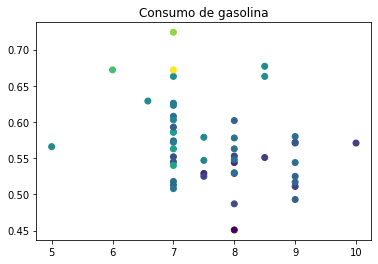

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_gasoline.gasolina_impuesto, df_gasoline.porcen_licencias_conducion_poblacion,
           c=df_gasoline.gasolina_Consumo)
ax.set_title("Consumo de gasolina")
plt.show()

## 8. Separando los datos para el entrenamiento y testeo

In [24]:
x_axis = df_gasoline.drop('gasolina_Consumo', axis=1)
y_axis = df_gasoline['gasolina_Consumo']

In [25]:
[x_train, x_test, y_train, y_test] = train_test_split(x_axis, y_axis, test_size=0.2, random_state=4)

## 9. Instanciando Support Vector Machine

In [26]:
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 10. Inferencia del modelo

In [27]:
y_pred = svm.predict(x_test)
inferencia = accuracy_score(y_test, y_pred)
print(f"\nInferencia del modelo: {str(inferencia)} %")


Inferencia del modelo: 0.0 %
